# Modules

In [23]:
import spectral_analysis as sa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import importlib
import sys
module = sys.modules["spectral_analysis"]
importlib.reload(module)

<module 'spectral_analysis' from 'd:\\Users\\rewas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\spectral_analysis.py'>

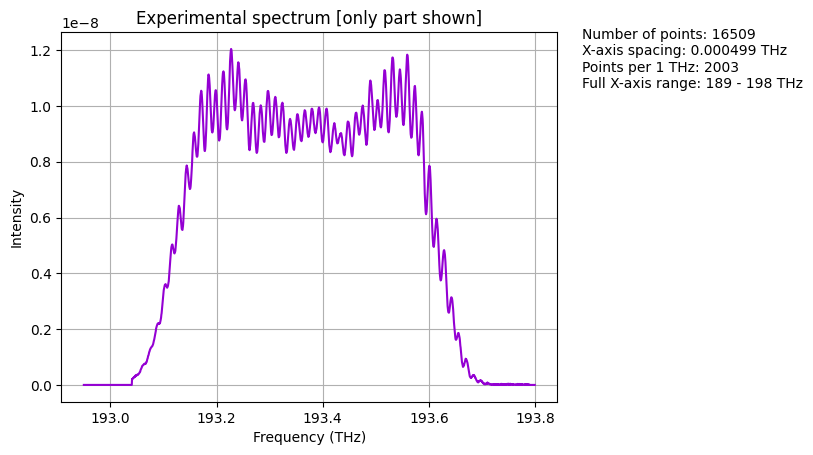

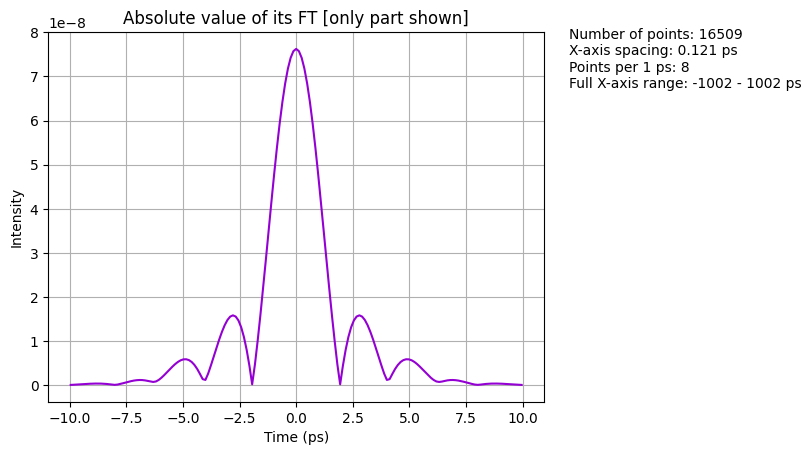

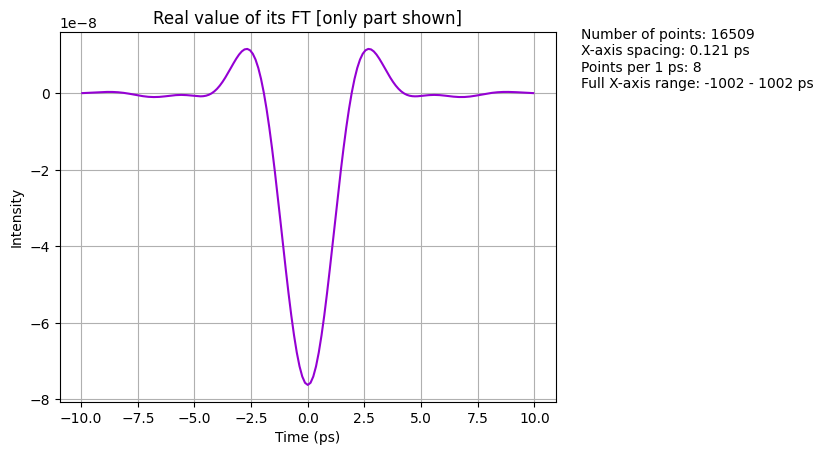

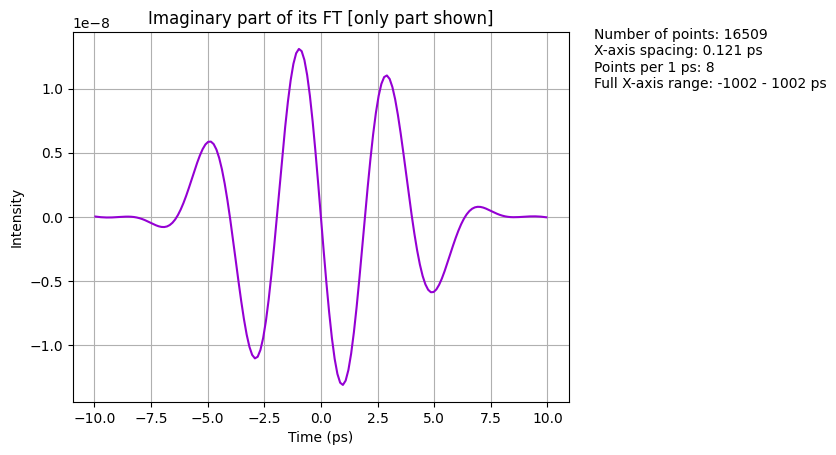

In [49]:
s = sa.load_csv("data/80d40c_shear.csv")
s.wl_to_freq()
s.zero_padding(5)
sa.plot(s, start = 192.95, end = 193.8, title = "Experimental spectrum")
s.fourier()
sa.plot(s, what_to_plot = "abs", start = -10, end = 10, title = "Absolute value of its FT")
for i in np.arange(0, len(s), 2):
    s.Y[i] *= -1
sa.plot(s, what_to_plot = "real", start = -10, end = 10, title = "Real value of its FT")
sa.plot(s, what_to_plot = "imag", start = -10, end = 10, title = "Imaginary part of its FT")

# Analysis

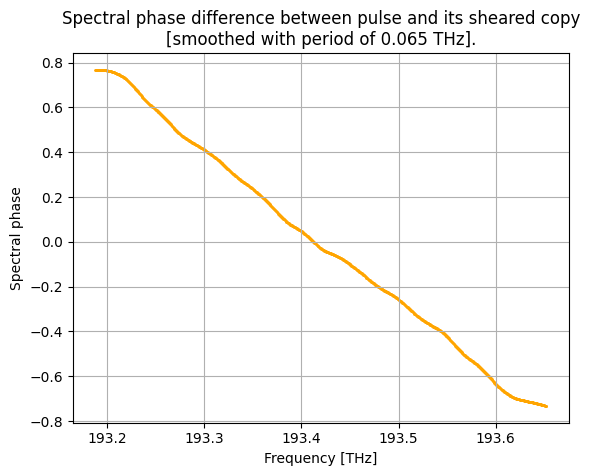

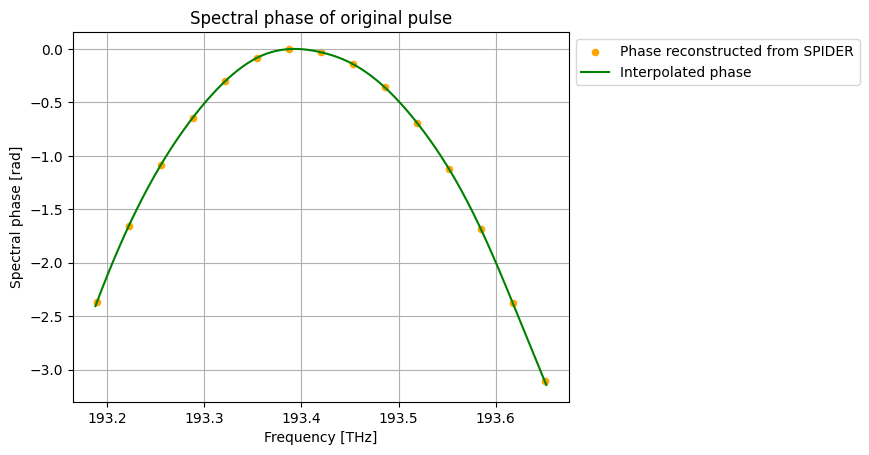

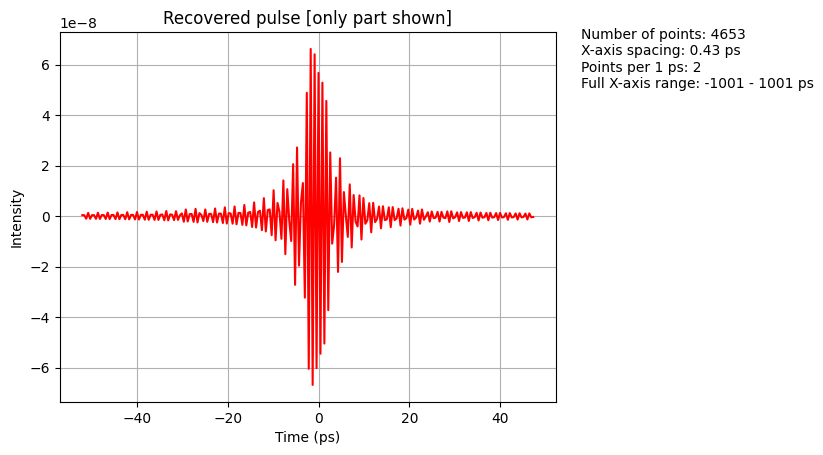

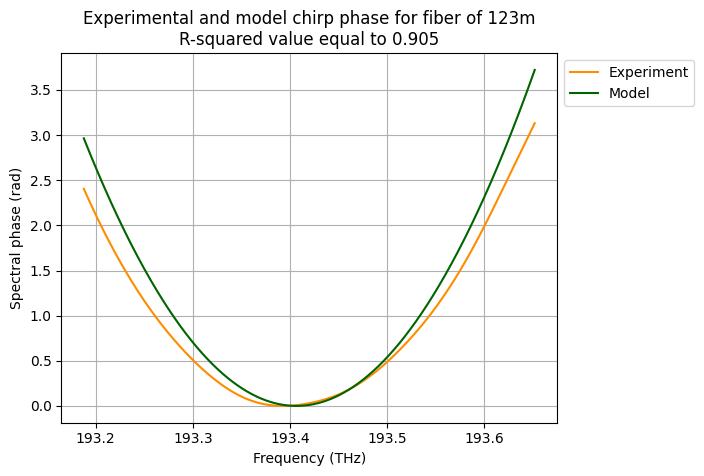

0.9051585134641872

In [25]:
shear = sa.find_shear("data/80d40c_shear.csv", 
            "data/80d40c_noshear.csv", 
            smoothing_period = 1/75,
            how = "fit", 
            plot = False)

phase = sa.spider("data/80d40c_pspectrum.csv", 
          "data/80d40c_tspectrum.csv",
          shear = shear,
          what_to_return = "phase",
          plot_pulse = True,
          smoothing_period = 0.065)[1]

sa.chirp_r2(phase, 123, True)